## Desafío - Preparación de datos y gráficos - Maria Laura Oyarce

#### La base de datos world-data-2023.csv proporciona una gran cantidad de información sobre todos los países del mundo, abarcando una amplia gama de indicadores y atributos. Incluye estadísticas demográficas, indicadores económicos, factores ambientales, métricas de atención médica, estadísticas educativas y mucho más. Con la representación de cada país, este conjunto de datos ofrece una perspectiva global completa sobre diversos aspectos de las naciones, lo que permite análisis en profundidad y comparaciones entre países.

In [1]:
#Celda para importar librerías necesarias para nuestro desafío
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga los datos y genera un dataFrame que excluya las columnas correspondientes a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una inspección inicial sobre ellos, considerando gráficos. Concluye.

In [2]:
#Cargamos los datos
df=pd.read_csv('world-data-2023.csv')

#Crearé un nuevo dataframe que contenga todas las columnas del df original, menos las que indica el encabezado
df_partial = df.drop(columns=['Abbreviation', 'Calling Code', 'Capital/Major City','Currency-Code','Largest city','Official language','Latitude','Longitude'])

In [3]:
#Visualizamos las primeras filas del nuevo dataframe
df_partial.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,638.0,$0.43,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,112.0,$0.95,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"


In [4]:
#Vemos la info del nuevo dataframe en donde nos indicará cuantos datos no nulos existen y el tipo de dato de la columna
df_partial.info()

#Esta linea nos mostrará cuántos datos nulos o "nan" existen en la columna
df_partial.apply(lambda x: sum(x.isnull()), axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                 

Text(0.5, 1.0, 'Mapa de valores nulos en el data frame')

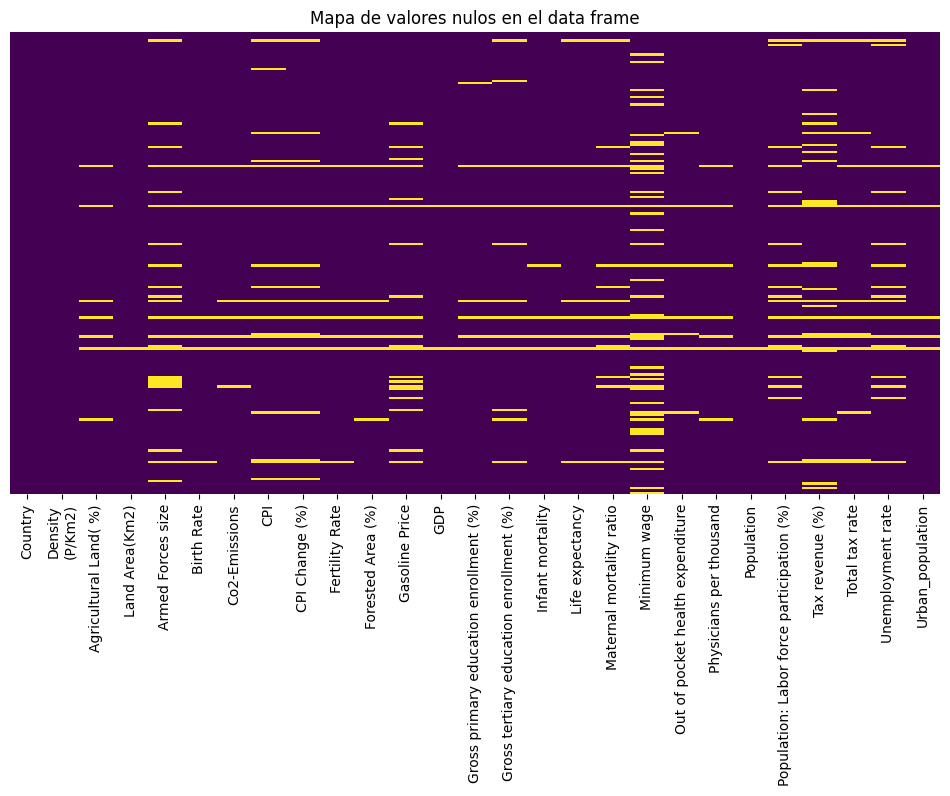

In [5]:
#Finalmente, podemos hacer un heatmap para visualizar que columnas tienen más datos nan
plt.figure(figsize=(12, 6))
sns.heatmap(df_partial.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos en el data frame')

#el argumento cbar= False elimina la barra de color, ya que en este caso no es necesario
#Los valores 0 (morado) en el mapa equivalen a datos no nulos y los valores 1 (amarillo) equivalen a datos nulos

De este análisis podemos concluir que:

- Existen columnas con distintos caracteres, lo que clasifica a la columna como object en vez de número (float o integer)
- Existen columnas que el número incluye coma, lo que no es reconocido por python
- La mayoría de las columnas tienen valores nulos, pero la que contiene más valores nulos es la de salario mínimo
- Existen filas (algunos paises) en donde la mayoría de sus columnas no tienen información

2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca haber correlación? ¿Para cuál(es) de ellas se observa más claramente?

Existen 6 columnas codificadas numéricamente: Tasa de nacimientos, Tasa de fertilidad, Mortalidad infantil, Expectativa de vida, ratio de mortalidad maternal y número de médicos. Para ver si hay correlaciones entre ellos, graficaremos todas las variables versus todas utilizando el gráfico pairplot de seaborn:

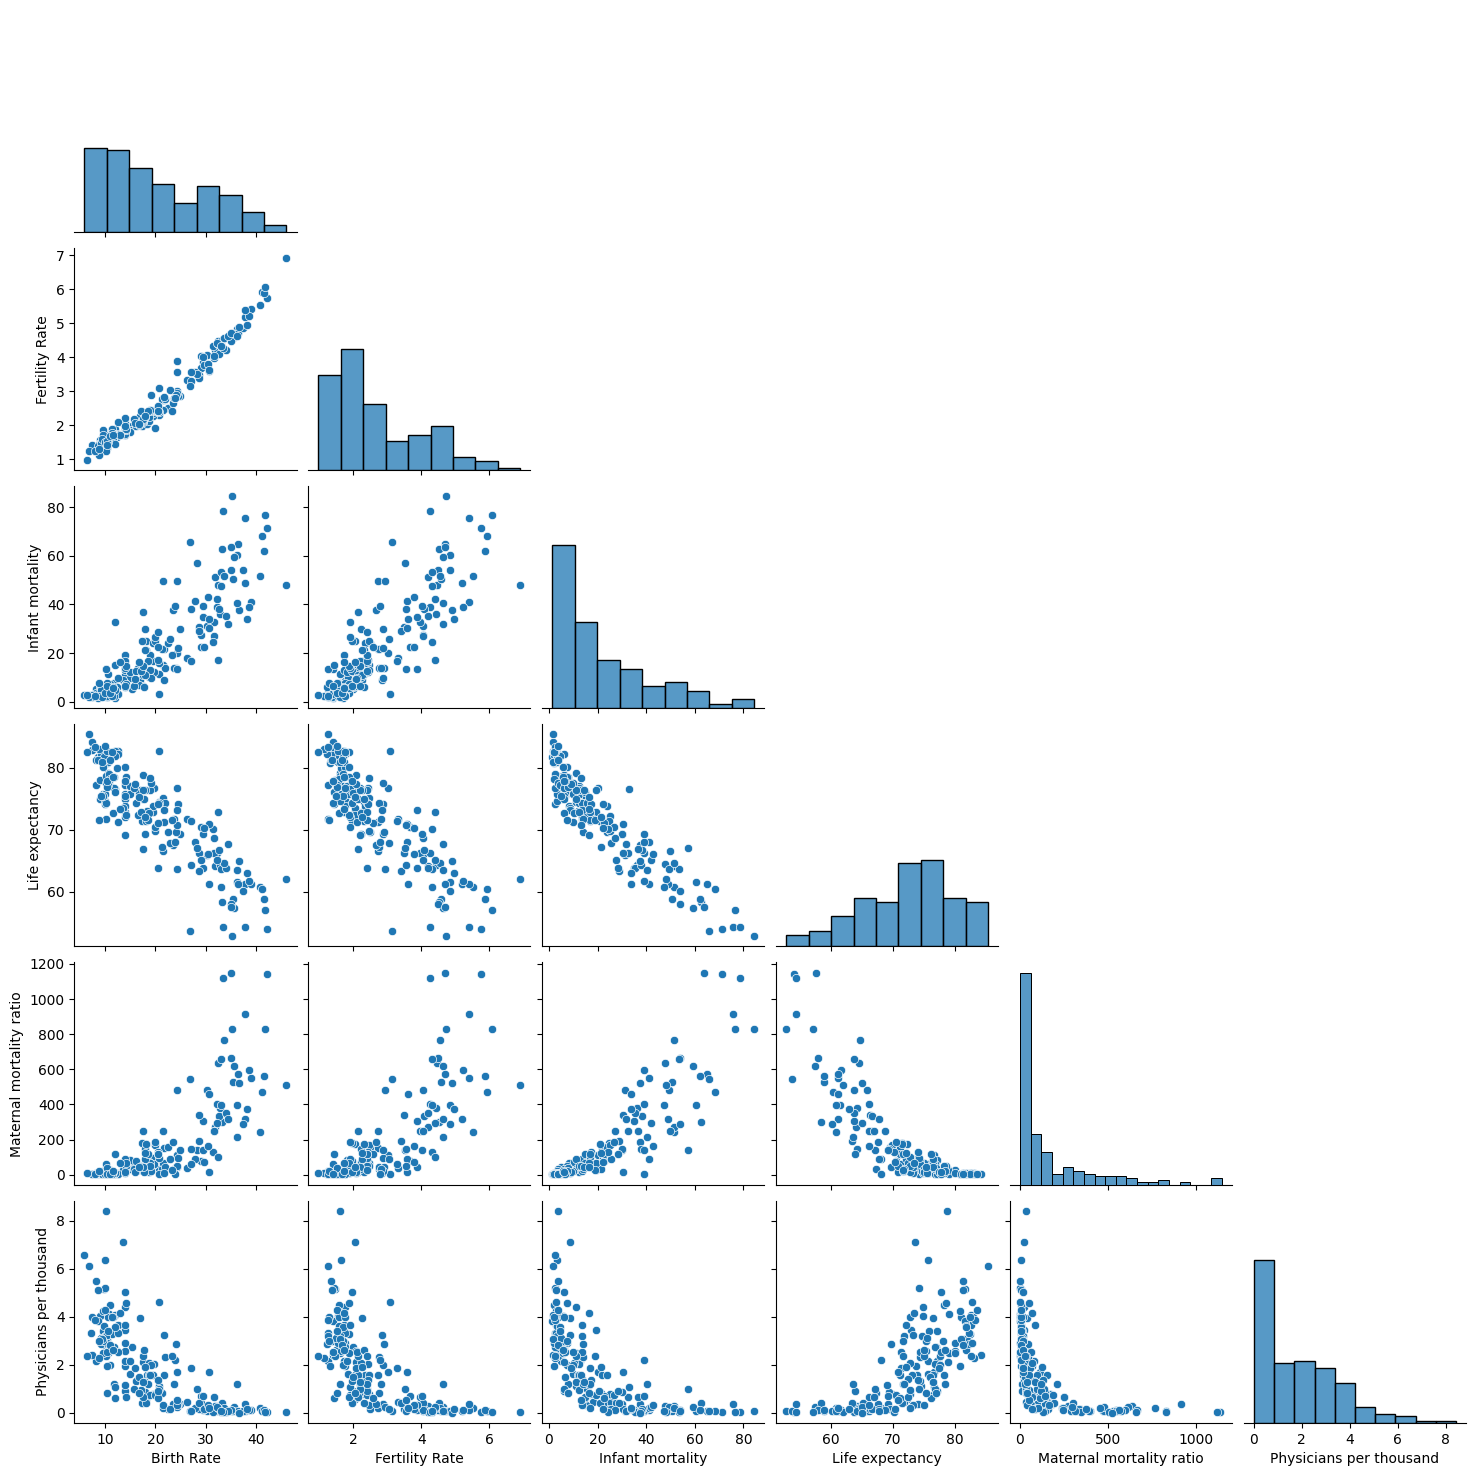

In [6]:
sns.pairplot(df_partial,corner='True')

Del pairplot podemos concluir que en todos los pares de variables existe una correlación. Pero la correlación que es más clara y con menos dispersión es la del par tasa de fertilidad-tasa de nacimiento (obviamente), teniendo una correlación directa. Otros pares que tienen una tendencia clara pero con un poco más de dispersión son expectacion de vida - tasa de nacimiento, expectacion de vida-tasa de fertilidad, expectación de vida- mortalidad infantil y medicos-ratio de mortalidad maternal. Todas ellas muestran una correlación inversa.

3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes y atípicos. Justifica en cada caso tu procedimiento.

In [7]:
#Primero eliminamos todas las filas en donde alguna de estas dos variables tenga un valor nulo
df_bf=df_partial[['Birth Rate', 'Fertility Rate']].dropna()

<Axes: >

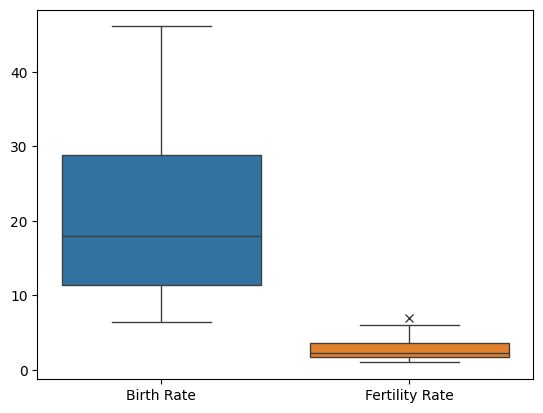

In [8]:
#Graficamos un boxplot para ver la distribucion de los valores y ver si encontramos algun outlier
sns.boxplot(data=df_bf,flierprops={"marker": 'x'})

In [ ]:
Q1 = df[variables_cuantitativas].quantile(0.25)
Q3 = df[variables_cuantitativas].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[variables_cuantitativas] < (Q1 - 1.5 * IQR)) | (df[variables_cuantitativas] > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df[mask]

In [9]:
#Para eliminar valores atipicos utilizaré el criterio del rango intercuartílico, ya que es el que utiliza seaborn
#para marcar los valores atípicos en los boxplots (como la x en nuestro plot)
q1=df_bf['Fertility Rate'].quantile(0.25)
q3=df_bf['Fertility Rate'].quantile(0.75)
iqr=q3-q1

# Calcular límites inferior y superior
ll=q1-1.5*iqr
ul=q3+1.5*iqr

# Filtrar datos para eliminar outliers
df_filtered=df_bf[(df_bf['Fertility Rate'] >= ll) & (df_bf['Fertility Rate'] <= ul)]

print (len(df_bf))
print (len(df_filtered))

188
187


En resumen, el boxplot nos indicó que existe solo 1 outlier en la columna de tasa de fertilidad. Utilizando el método del rango intercuartílico pudimos remover ese outlier, lo que se ve reflejado en el largo del dataframe final (pasó de 188 filas a 187 filas).

4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los datos preparados. Compara con lo obtenido anteriormente.

<Axes: xlabel='Birth Rate', ylabel='Fertility Rate'>

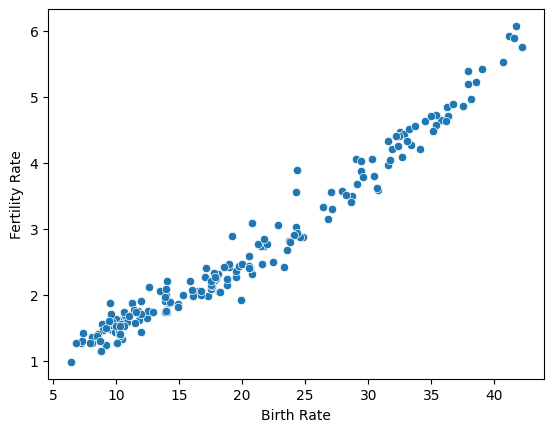

In [10]:
sns.scatterplot(x=df_filtered['Birth Rate'],y=df_filtered['Fertility Rate'])

Comparando con el panel obtenido en el pairplot de la pregunta 2 podemos apreciar que el punto que estaba más arriba a la derecha desapareció, ya que éste era el valor atípico en nuestro pequeño dataframe

5. Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la esperanza de vida. ¿Qué puedes concluir?

In [11]:
#Primero eliminamos los valores nulos
df_pl=df_partial[['Physicians per thousand', 'Life expectancy']].dropna()

<Axes: >

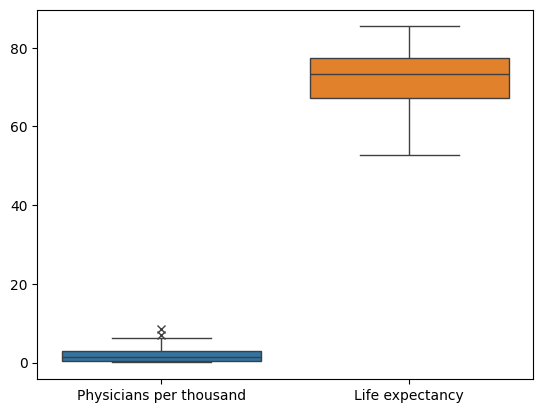

In [12]:
#Graficamos el boxplot para ver outliers
sns.boxplot(data=df_pl,flierprops={'marker': 'x'})

In [13]:
#Aplicamos el método del rango intercuartílico para eliminar los 2 outliers que aparecen en la columna de cantidad de
#médicos
q1=df_pl['Physicians per thousand'].quantile(0.25)
q3=df_pl['Physicians per thousand'].quantile(0.75)
iqr=q3-q1

# Calcular límites inferior y superior
ll=q1-1.5*iqr
ul=q3+1.5*iqr

# Filtrar datos para eliminar outliers
df_filtered_2=df_pl[(df_pl['Physicians per thousand'] >= ll) & (df_pl['Physicians per thousand'] <= ul)]

print (len(df_pl))
print (len(df_filtered_2))

185
183


<Axes: xlabel='Life expectancy', ylabel='Physicians per thousand'>

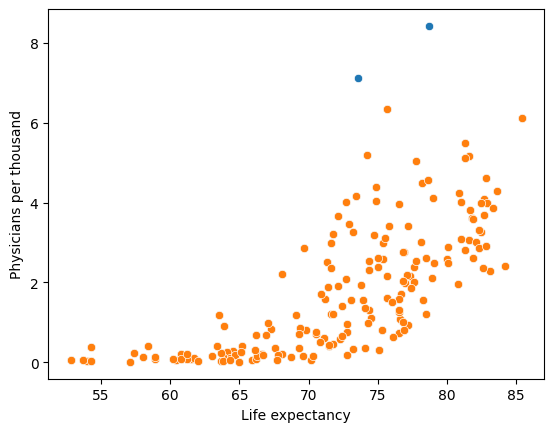

In [14]:
sns.scatterplot(x=df_pl['Life expectancy'],y=df_pl['Physicians per thousand'])
sns.scatterplot(x=df_filtered_2['Life expectancy'],y=df_filtered_2['Physicians per thousand'])

En este caso los puntos azules indican los valores atípicos encontrados utilizando el criterio del rango intercuartílico. Si bien la correlación entre ambas variables sigue teniendo una alta dispersión, se ve claramente la tendencia de una correlacion directa, es decir, a mayor expectación de vida, mayor es la cantidad de médicos.

6. Construye un gráfico para representar la población total de los países y su producto interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia y/o transforma los datos). Justifica.

In [15]:
#Primero veamos las columnas del PIB y la densidad
print(df['GDP'].head(15))
print(df['Density\n(P/Km2)'].head(15))

0        $19,101,353,833 
1        $15,278,077,447 
2       $169,988,236,398 
3         $3,154,057,987 
4        $94,635,415,870 
5         $1,727,759,259 
6       $449,663,446,954 
7        $13,672,802,158 
8     $1,392,680,589,329 
9       $446,314,739,528 
10       $39,207,000,000 
11       $12,827,000,000 
12       $38,574,069,149 
13      $302,571,254,131 
14        $5,209,000,000 
Name: GDP, dtype: object
0        60
1       105
2        18
3       164
4        26
5       223
6        17
7       104
8         3
9       109
10      123
11       39
12    2,239
13    1,265
14      668
Name: Density\n(P/Km2), dtype: object


Podemos ver que ambas columnas fueron catalogadas como object ya que incluyen simbolos como las comas y $. Primero eliminaremos estos simbolos y transformaremos los datos a float:

In [16]:
#Primero removemos los simbolos de la columna del PIB
df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '').astype(float)

#Ahora para la columna de Densidad
df['Density\n(P/Km2)'] = df['Density\n(P/Km2)'].str.replace(',', '').astype(float)

In [17]:
#Chequeamos nuevamente
print(df['GDP'].head(15))
print(df['Density\n(P/Km2)'].head(15))

0     1.910135e+10
1     1.527808e+10
2     1.699882e+11
3     3.154058e+09
4     9.463542e+10
5     1.727759e+09
6     4.496634e+11
7     1.367280e+10
8     1.392681e+12
9     4.463147e+11
10    3.920700e+10
11    1.282700e+10
12    3.857407e+10
13    3.025713e+11
14    5.209000e+09
Name: GDP, dtype: float64
0       60.0
1      105.0
2       18.0
3      164.0
4       26.0
5      223.0
6       17.0
7      104.0
8        3.0
9      109.0
10     123.0
11      39.0
12    2239.0
13    1265.0
14     668.0
Name: Density\n(P/Km2), dtype: float64


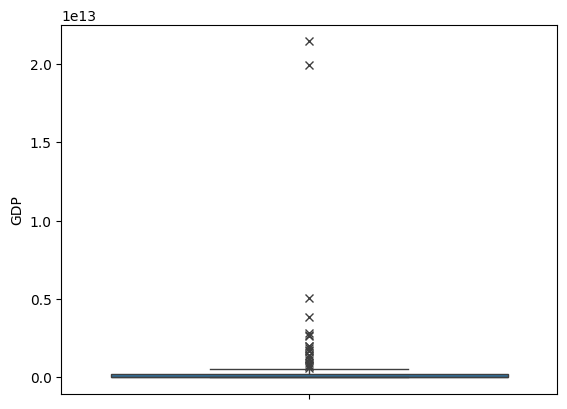

<Axes: ylabel='Density\n(P/Km2)'>

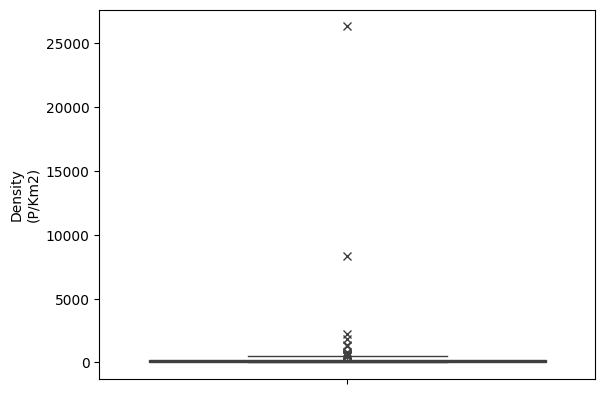

In [18]:
#Armamos nuestro mini dataframe y eliminamos las filas que contienen nan en la columna de PIB
df_pd=df[['GDP', 'Density\n(P/Km2)']].dropna()

#Graficamos para ver la distribucion de datos y si existe algun valor atípico
sns.boxplot(data=df_pd['GDP'],flierprops={'marker': 'x'})
plt.show()
sns.boxplot(data=df_pd['Density\n(P/Km2)'],flierprops={'marker': 'x'})

In [19]:
#Existen muchos valores atípicos por lo que los eliminaremos utilizando el criterio de IQR

q1=df_pd.quantile(0.25)
q3=df_pd.quantile(0.75)
iqr=q3-q1

# Calculamos límites inferior y superior
ll=q1-1.5*iqr
ul=q3+1.5*iqr

# Filtramos datos para eliminar outliers
df_filtered=df_pd[~((df_pd < ll) | (df_pd > ul)).any(axis=1)]

print (len(df_pd))
print (len(df_filtered))

193
159


Text(0, 0.5, 'Densidad de población por km$^2$')

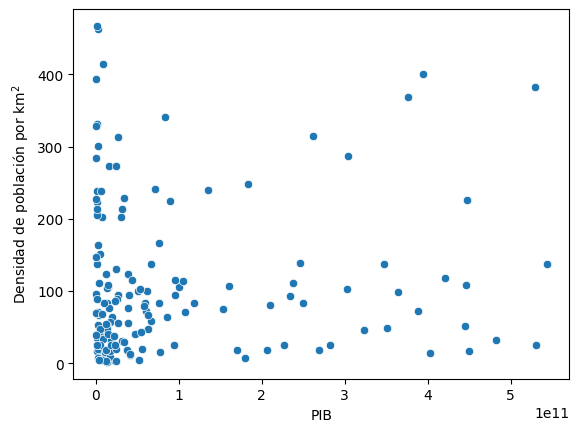

In [20]:
#Finalmente graficamos
sns.scatterplot(x=df_filtered['GDP'],y=df_filtered['Density\n(P/Km2)'])
plt.xlabel('PIB')
plt.ylabel('Densidad de población por km$^2$')

A partir de este gráfico puedo concluir 2 cosas:

- Existe una gran concentración de países con baja densidad de población y bajo PIB
- No parece haber una relación lineal o no lineal evidente entre la densidad de población y el PIB. Países con densidades de población bajas pueden tener tanto un PIB alto como bajo. Esto implica que otros factores (como tamaño del territorio, desarrollo económico, recursos naturales, etc.) pueden tener un impacto mayor en el PIB que solo la densidad poblacional.

7. Escoge otro par de datos, límpialos, prepáralos y analiza su posible relación. Justifica utilizando las herramientas vistas y gráficos adecuados.

Para este ejercicio utilizaré el par de datos de mortalidad infantil y el PIB.

In [21]:
#Primero veamos la columna de expectacion de vida, ya que la del PIB está lista
print(df['Infant mortality'].head(20))

0     47.9
1      7.8
2     20.1
3      2.7
4     51.6
5      5.0
6      8.8
7     11.0
8      3.1
9      2.9
10    19.2
11     8.3
12     6.1
13    25.1
14    11.3
15     2.6
16     2.9
17    11.2
18    60.5
19    24.8
Name: Infant mortality, dtype: float64


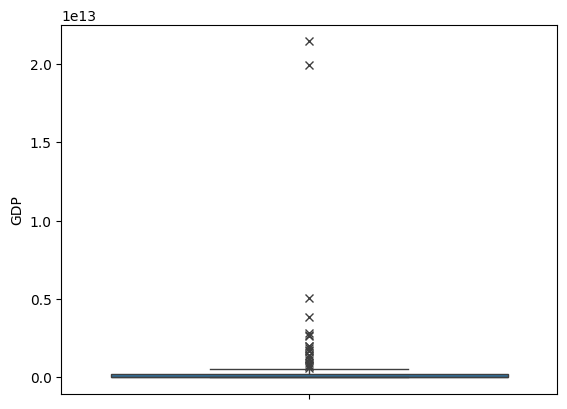

<Axes: ylabel='Infant mortality'>

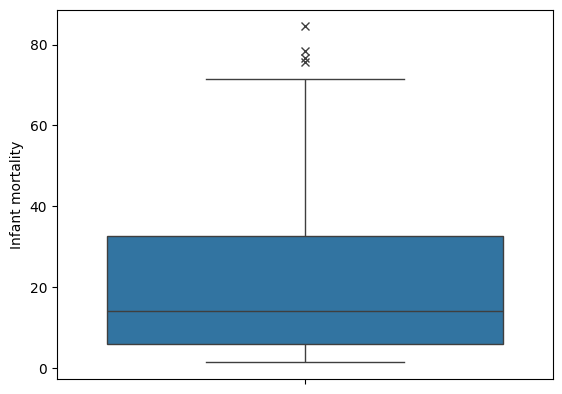

In [22]:
#Armamos nuestro mini dataframe y eliminamos las filas que contienen nan 
df_pim=df[['GDP', 'Infant mortality']].dropna()

#Graficamos para ver la distribucion de datos y si existe algun valor atípico
sns.boxplot(data=df_pim['GDP'],flierprops={'marker': 'x'})
plt.show()
sns.boxplot(data=df_pim['Infant mortality'],flierprops={'marker': 'x'})

In [23]:
#Eliminamos outliers utilizando el criterio de IQR

q1=df_pim.quantile(0.25)
q3=df_pim.quantile(0.75)
iqr=q3-q1

# Calculamos límites inferior y superior
ll=q1-1.5*iqr
ul=q3+1.5*iqr

# Filtramos datos para eliminar outliers
df_filtered=df_pim[~((df_pim < ll) | (df_pim > ul)).any(axis=1)]

print (len(df_pim))
print (len(df_filtered))

189
164


Text(0, 0.5, 'Mortalidad infantil')

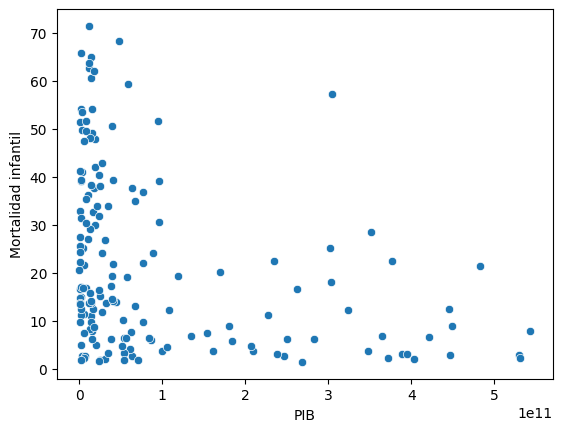

In [24]:
#Finalmente graficamos
sns.scatterplot(x=df_filtered['GDP'],y=df_filtered['Infant mortality'])
plt.xlabel('PIB')
plt.ylabel('Mortalidad infantil')

Del gráfico podemos concluir que:

- A menor PIB existe una mayor tasa de mortalidad infantil.
- Existe un outlier interesante que tiene un PIB promedio pero una alta mortalidad infantil.